In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/techin/credit-risk-model/data/raw/data.csv")

In [3]:
print(df.head())
print(df.info())
print(df.shape)
df.describe()

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [4]:
# List of identifier columns to check
id_columns = [
    'TransactionId',
    'BatchId',
    'AccountId',
    'SubscriptionId',
    'CustomerId'
]

for col in id_columns:
    unique_count = df[col].nunique()
    total_rows = len(df) # Or df.shape[0]

    print(f"Column: {col}")
    print(f"  Number of unique values: {unique_count}")
    print(f"  Total number of rows: {total_rows}")

    # Check if it's truly unique (i.e., unique count equals total rows)
    if unique_count == total_rows:
        print(f"  Insight: This column appears to be a unique identifier for each transaction/row.")
    elif unique_count < total_rows:
        print(f"  Insight: This column has {total_rows - unique_count} duplicate values, indicating it's not unique per transaction/row. This is expected for BatchId, AccountId, etc., as multiple transactions can belong to them.")
    print("-" * 50)


Column: TransactionId
  Number of unique values: 95662
  Total number of rows: 95662
  Insight: This column appears to be a unique identifier for each transaction/row.
--------------------------------------------------
Column: BatchId
  Number of unique values: 94809
  Total number of rows: 95662
  Insight: This column has 853 duplicate values, indicating it's not unique per transaction/row. This is expected for BatchId, AccountId, etc., as multiple transactions can belong to them.
--------------------------------------------------
Column: AccountId
  Number of unique values: 3633
  Total number of rows: 95662
  Insight: This column has 92029 duplicate values, indicating it's not unique per transaction/row. This is expected for BatchId, AccountId, etc., as multiple transactions can belong to them.
--------------------------------------------------
Column: SubscriptionId
  Number of unique values: 3627
  Total number of rows: 95662
  Insight: This column has 92035 duplicate values, indi

Format change 

In [6]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['CountryCode'] = df['CountryCode'].astype('category')
df['PricingStrategy'] = df['PricingStrategy'].astype('category')

In [8]:

categorical_columns = [
    'CurrencyCode',
    'CountryCode',  
    'ProviderId',
    'ProductId',
    'ProductCategory',
    'ChannelId',
    'PricingStrategy', 
    'FraudResult'       # Target variable, check for imbalance
]
for col in categorical_columns:
    print(f"\nValue Counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 50)


Value Counts for 'CurrencyCode':
CurrencyCode
UGX    95662
Name: count, dtype: int64
--------------------------------------------------

Value Counts for 'CountryCode':
CountryCode
256    95662
Name: count, dtype: int64
--------------------------------------------------

Value Counts for 'ProviderId':
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64
--------------------------------------------------

Value Counts for 'ProductId':
ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2       236
ProductId_20      216
ProductId_8       197
ProductId_24      175
ProductId_22      112
ProductId_7        86
ProductId_27       31
ProductId_5        25
ProductId_9      

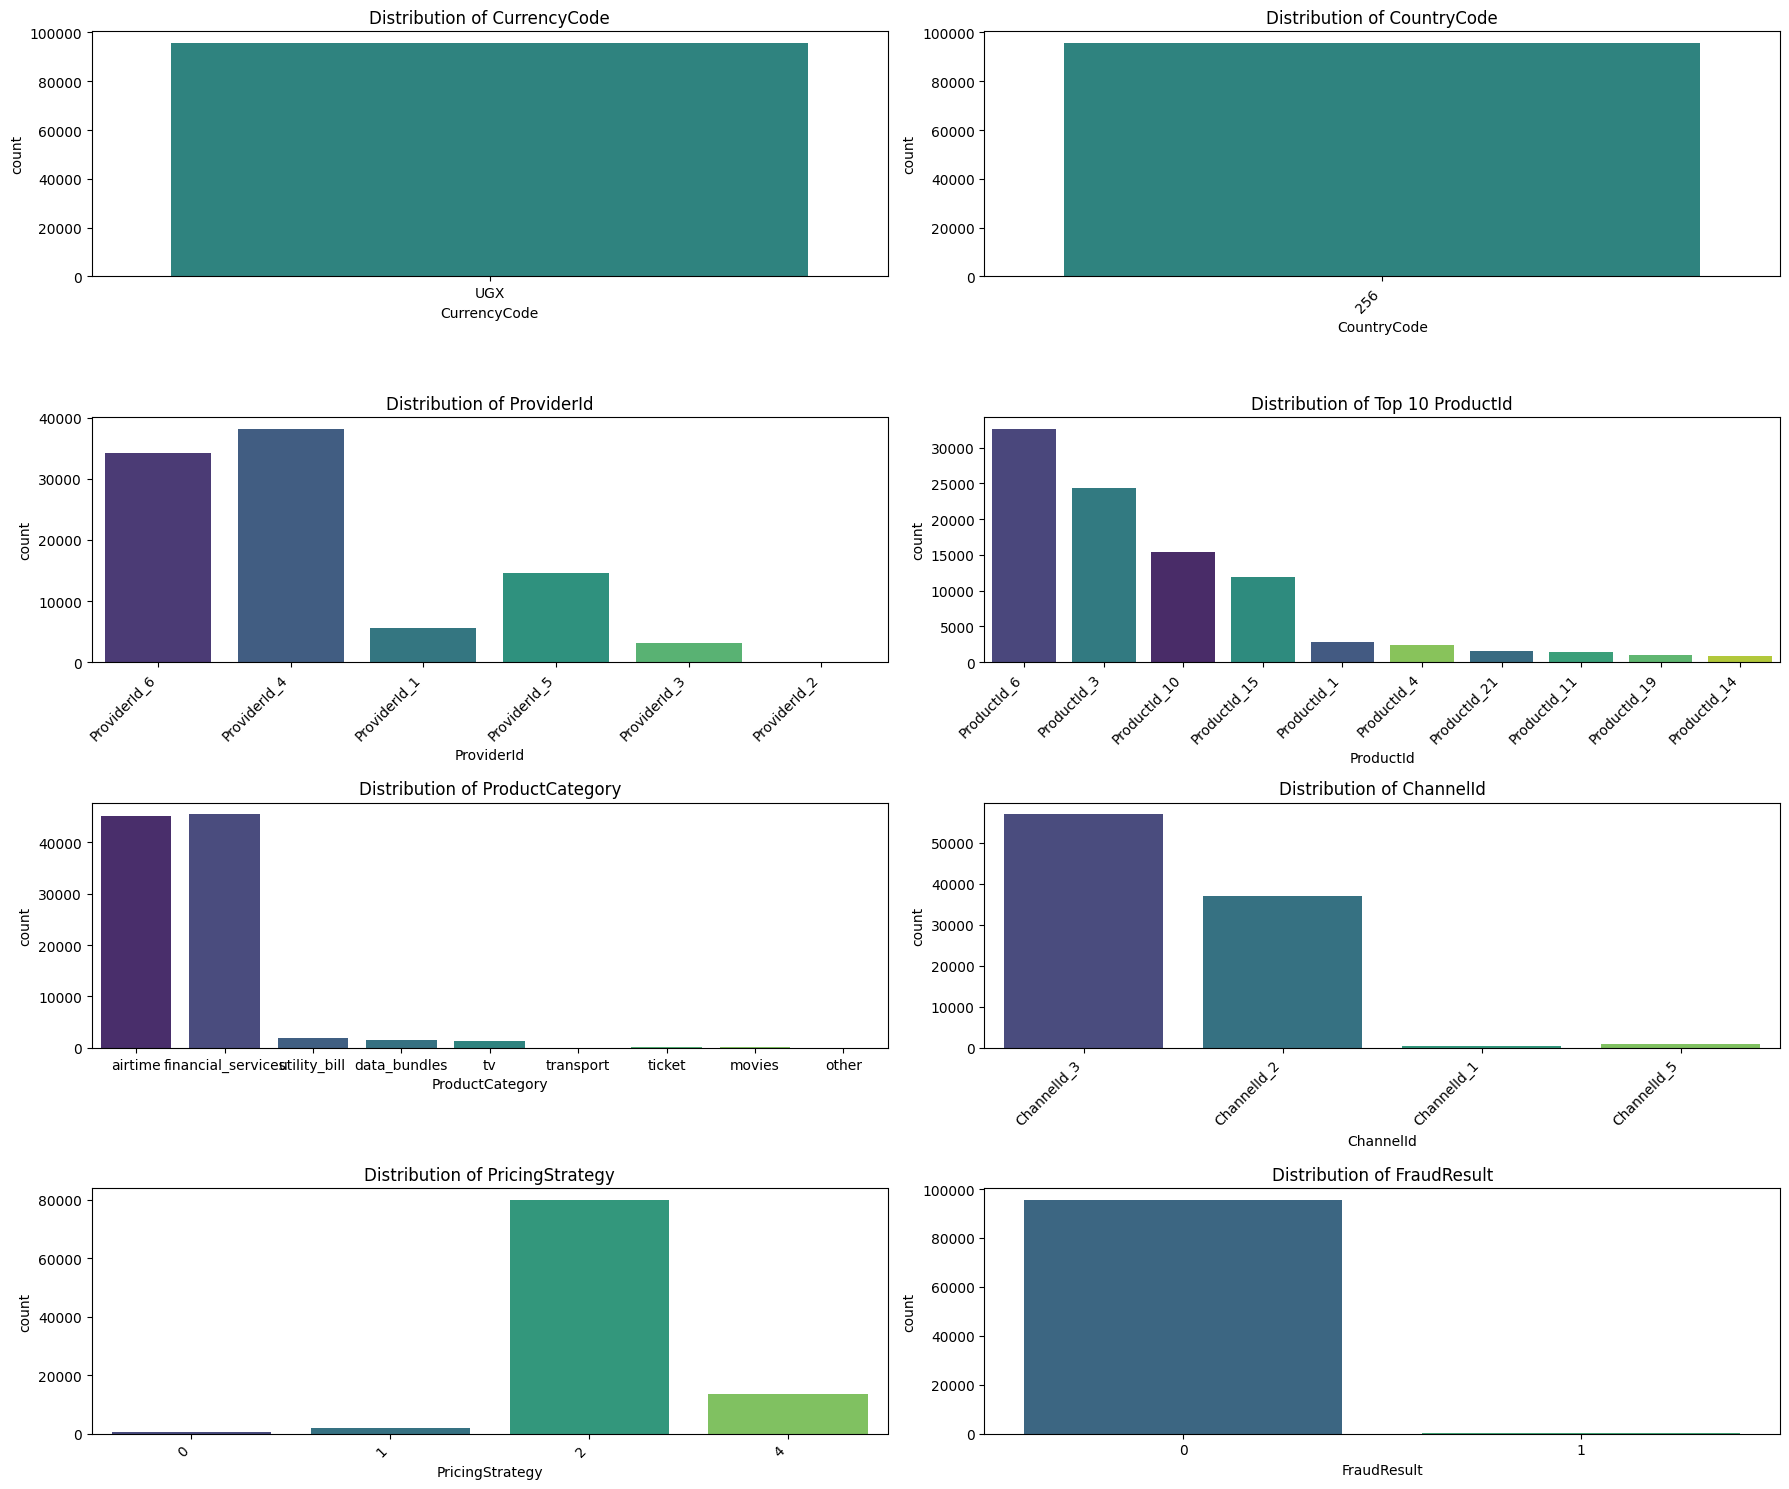

In [12]:
# Set up the matplotlib figure size for better readability
plt.figure(figsize=(18, 15))  # Adjust overall figure size as needed

# Loop through each categorical column and create a count plot
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 2, i + 1)  # Arrange plots in a grid (e.g., 4 rows, 2 columns)

    # For ProductId, which might have many unique values, consider showing top N
    if col == 'ProductId':
        top_n = df[col].value_counts().head(10).index  # Get top 10 products
        sns.countplot(
            data=df[df[col].isin(top_n)],
            x=col,
            hue=col,
            order=top_n,
            palette='viridis',
            legend=False
        )
        plt.title(f'Distribution of Top 10 {col}')
        plt.xticks(rotation=45, ha='right')  # Rotate labels for readability

    else:
        sns.countplot(
            data=df,
            x=col,
            hue=col,
            palette='viridis',
            legend=False
        )
        plt.title(f'Distribution of {col}')
        if col in ['CountryCode', 'ProviderId', 'ChannelId', 'PricingStrategy']:
            plt.xticks(rotation=45, ha='right')  # Rotate labels if category names are long

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()  # Display all plots

In [13]:
df[["Amount", "Value"]].describe()

,Amount,Value
count,9.566200e+04,9.566200e+04
mean,6.717846e+03,9.900584e+03
std,1.233068e+05,1.231221e+05
min,-1.000000e+06,2.000000e+00
25%,-5.000000e+01,2.750000e+02
50%,1.000000e+03,1.000000e+03
75%,2.800000e+03,5.000000e+03
max,9.880000e+06,9.880000e+06


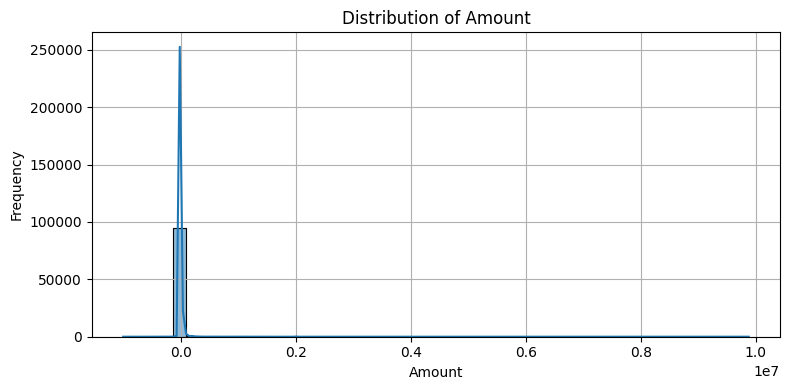

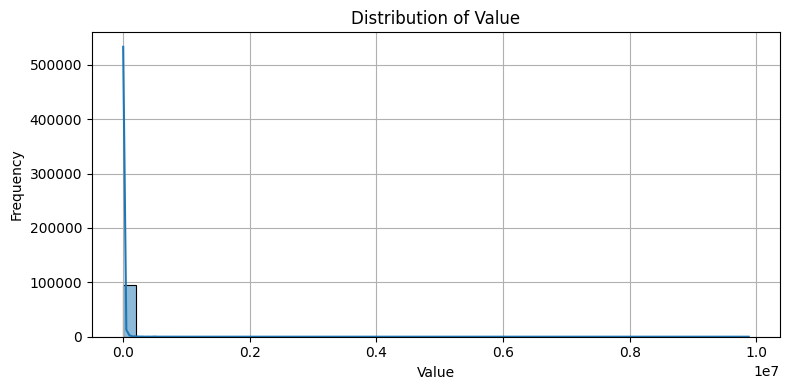

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Amount', 'Value']

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

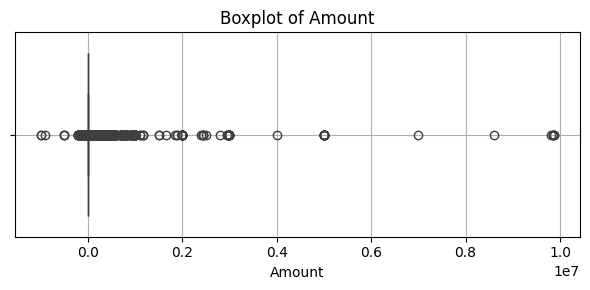

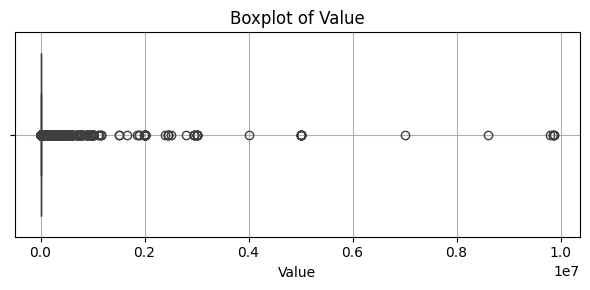

In [15]:
for col in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Key Insights from Numerical Feature Distribution

- **Dominance of Small Transactions**  
  The overwhelming majority of transactions are small, centered around zero — particularly evident in the `Amount` and `Value` features. This indicates that most users are engaging in low-value purchases.

- **Extreme Positive Skewness**  
  Both `Amount` and `Value` exhibit a very long right tail, suggesting a heavily skewed distribution toward higher transaction amounts. These rare but high-value transactions can disproportionately influence model training if not handled appropriately.

- **Significant Outliers**  
  There are several transactions with exceptionally large values, which stand out as clear outliers. While these may reflect legitimate large purchases, they could also signal anomalies or potentially fraudulent activity. These should be carefully examined during preprocessing and model development.

In [16]:
# 1. Check unique combinations of AccountId and CustomerId
unique_account_customer_combinations = df[['AccountId', 'CustomerId']].drop_duplicates()
print(f"Number of unique AccountId-CustomerId combinations: {len(unique_account_customer_combinations)}")


accounts_with_multiple_customers = df.groupby('AccountId')['CustomerId'].nunique()
accounts_with_multiple_customers = accounts_with_multiple_customers[accounts_with_multiple_customers > 1]
if not accounts_with_multiple_customers.empty:
    print(f"WARNING: {len(accounts_with_multiple_customers)} Account(s) are associated with more than one CustomerId. This is unusual and might warrant further investigation if this is not expected behavior for Bati Bank.")
    # print("Examples of Accounts with multiple CustomerIds:")
    # print(accounts_with_multiple_customers.head()) # Uncomment to see examples
else:
    print("Insight: Each AccountId maps to a unique CustomerId. This is the common and expected scenario.")

# 3. Check if each CustomerId maps to exactly one AccountId
# If not, it means a single customer can have multiple accounts (more common)
customers_with_multiple_accounts = df.groupby('CustomerId')['AccountId'].nunique()
customers_with_multiple_accounts = customers_with_multiple_accounts[customers_with_multiple_accounts > 1]
if not customers_with_multiple_accounts.empty:
    print(f"Insight: {len(customers_with_multiple_accounts)} Customer(s) have more than one AccountId. This is common; a customer might have multiple products or services, each with a distinct account.")
    # print("Examples of Customers with multiple AccountIds:")
    # print(customers_with_multiple_accounts.head()) # Uncomment to see examples
else:
    print("Insight: Each CustomerId maps to a unique AccountId. (Less common in financial services but possible).")

# 4. Check unique combinations of AccountId and SubscriptionId
unique_account_subscription_combinations = df[['AccountId', 'SubscriptionId']].drop_duplicates()
print(f"\nNumber of unique AccountId-SubscriptionId combinations: {len(unique_account_subscription_combinations)}")

# 5. Check if each AccountId maps to exactly one SubscriptionId
accounts_with_multiple_subscriptions = df.groupby('AccountId')['SubscriptionId'].nunique()
accounts_with_multiple_subscriptions = accounts_with_multiple_subscriptions[accounts_with_multiple_subscriptions > 1]
if not accounts_with_multiple_subscriptions.empty:
    print(f"Insight: {len(accounts_with_multiple_subscriptions)} Account(s) are associated with more than one SubscriptionId (i.e., multiple subscriptions per account). This could indicate different services linked to the same account.")
    # print("Examples of Accounts with multiple SubscriptionIds:")
    # print(accounts_with_multiple_subscriptions.head()) # Uncomment to see examples
else:
    print("Insight: Each AccountId maps to a unique SubscriptionId.")

# 6. Check if each SubscriptionId maps to exactly one AccountId
subscriptions_with_multiple_accounts = df.groupby('SubscriptionId')['AccountId'].nunique()
subscriptions_with_multiple_accounts = subscriptions_with_multiple_accounts[subscriptions_with_multiple_accounts > 1]
if not subscriptions_with_multiple_accounts.empty:
    print(f"WARNING: {len(subscriptions_with_multiple_accounts)} Subscription(s) are associated with more than one AccountId. This is unusual; typically, a subscription belongs to a single account.")
else:
    print("Insight: Each SubscriptionId maps to a unique AccountId. This is the common and expected scenario.")


print("-" * 50)

Number of unique AccountId-CustomerId combinations: 8222
Insight: 2641 Customer(s) have more than one AccountId. This is common; a customer might have multiple products or services, each with a distinct account.

Number of unique AccountId-SubscriptionId combinations: 3634
Insight: 1 Account(s) are associated with more than one SubscriptionId (i.e., multiple subscriptions per account). This could indicate different services linked to the same account.
--------------------------------------------------


### Interpretation of ID Relationship Analysis

- **Number of unique `AccountId`-`CustomerId` combinations: 8,222**  
  This is significantly higher than the number of unique `AccountIds` (3,633) or `CustomerIds` (3,742).  
  ➤ **Interpretation**: There is **not** a simple one-to-one mapping between `AccountId` and `CustomerId` in either direction.

---

#### 🔶 Warning: 10 `AccountId`s are associated with more than one `CustomerId`
- This is an **unusual but minor** anomaly.
- **Possible Reasons**: Joint accounts, data entry errors, or business-specific rules.
- **Modeling Implication**: Affects only ~0.27% of accounts. Can be safely ignored unless the business requires further investigation.

---

#### ✅ Insight: 2,641 `CustomerId`s have more than one `AccountId`
- This is a **critical insight**.
- Out of 3,742 unique customers, about **70.6%** have transactions across multiple accounts.
- **Modeling Implication**:  
  ➤ Use `CustomerId` as the **primary unit** for defining users or borrowers.  
  ➤ Aggregate features (e.g., RFM) across all accounts tied to the same `CustomerId` for a **holistic credit profile**.

---

- **Number of unique `AccountId`-`SubscriptionId` combinations: 3,634**  
  Very close to the number of unique `AccountIds` (3,633), indicating an almost perfect one-to-one mapping.

#### 🔶 Insight: 1 `AccountId` has multiple `SubscriptionId`s
- A rare edge case.
- **Modeling Implication**: Negligible impact; can be ignored unless further investigation is required.

---

#### 🔶 Warning: 6 `SubscriptionId`s are associated with more than one `AccountId`
- Another **uncommon but minor** anomaly.
- **Possible Reasons**: Business cases where a subscription spans multiple accounts or data inconsistencies.
- **Modeling Implication**: Not likely to impact modeling significantly, but should be documented as a **data quality issue**.

In [17]:
# Group by AccountId and count the number of unique CustomerIds for each account
accounts_customer_count = df.groupby('AccountId')['CustomerId'].nunique()

# Filter to find accounts where the unique CustomerId count is greater than 1
accounts_with_multiple_customers = accounts_customer_count[accounts_customer_count > 1]

# Get the list of AccountIds
list_of_problem_accounts = accounts_with_multiple_customers.index.tolist()

print(f"\nNumber of Account(s) associated with more than one CustomerId: {len(list_of_problem_accounts)}")

if not accounts_with_multiple_customers.empty:
    print("\nAccountIds with multiple associated CustomerIds:")
    for account_id in list_of_problem_accounts:
        print(f"- {account_id}")

    # Optional: Display some transactions for these problematic accounts
    print("\n--- Sample Transactions for these problematic accounts ---")
    # To avoid printing too much, we'll just show the first few rows for each account
    for account_id in list_of_problem_accounts:
        print(f"\nTransactions for AccountId: {account_id}")
        print(df[df['AccountId'] == account_id][['AccountId', 'CustomerId', 'TransactionId', 'TransactionStartTime', 'Amount']].head())
        print("-" * 30)

else:
    print("No Account(s) found associated with more than one CustomerId. (This means the warning previously seen was likely due to a minor variation in data subsets or a slight misinterpretation, or it was fixed after a data load.)")

print("-" * 50)


Number of Account(s) associated with more than one CustomerId: 10

AccountIds with multiple associated CustomerIds:
- AccountId_10
- AccountId_1074
- AccountId_168
- AccountId_2366
- AccountId_2420
- AccountId_398
- AccountId_4249
- AccountId_4713
- AccountId_4840
- AccountId_4841

--- Sample Transactions for these problematic accounts ---

Transactions for AccountId: AccountId_10
        AccountId       CustomerId         TransactionId  \
626  AccountId_10  CustomerId_1093   TransactionId_20966   
641  AccountId_10  CustomerId_4552  TransactionId_106422   
643  AccountId_10  CustomerId_4552   TransactionId_28715   
660  AccountId_10  CustomerId_4552   TransactionId_83362   
674  AccountId_10   CustomerId_328   TransactionId_10091   

         TransactionStartTime   Amount  
626 2018-11-15 18:00:39+00:00  -2000.0  
641 2018-11-15 18:32:11+00:00 -10000.0  
643 2018-11-15 18:37:17+00:00  -1000.0  
660 2018-11-15 19:12:44+00:00  -2000.0  
674 2018-11-15 19:30:05+00:00  -5000.0  
--------